# Citi Bike Usage in JC

* Jersey City’s bike share system, Citi Bike is the largest system in the USA and an essential part of the city’s transportation network.

* Citi Bike consists of 20,000 bikes that are locked into a network of docking stations throughout the city and 1,300 stations across Manhattan, Brooklyn, Queens, the Bronx and Jersey City.

* The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips.

* People use bike share to commute to work or school, run errands, get to appointments or social engagements, and more.

### How its used?
* Citi Bike is available for use 24 hours/day, 7 days/week, 365 days/year. Customers either become an Annual Member or buy a short-term pass through the Citi Bike app. Then it is possible to find an available bike nearby, and get a ride code or use your member key to unlock it. There is no limit for taking any rides once your pass or membership is active. The customer can return the rented bike to any station, and wait for the green light on the dock to make sure it’s locked.

### The CitiBike JC Project Aim
* To analyze Citi Bike users according to the personal information such as gender, age and customer type and gain a better understanding of the target customer profile of Citi Bike.

* To analyze the demographic nature of the with the calculation of the busiest bus stations.

### Data Source
* Citi Bike has an immense transportation data that is harvested from the Citi Bike app. Their database is updated with thousand of new logs every single day. The large amounts of data is collected according to th NYCBS Data Use Policy by the company and is open to public on the company website. The bike sharing service has invited developers, engineers, statisticians, artists, academics to analyse, visualize and manipulate the NYC bike share data without any consequence.

### Link to Data
[Citi Bike System Data](https://s3.amazonaws.com/tripdata/index.html)

### Data Content
* The data set is of two different types, 2021/02 before and 2021/02 after, and the analysis was prepared accordingly.

>**Dataset after 202102 (including 202102)**
- Ride ID
- Rideable type
- Started at
- Ended at
- Start station name
- Start station ID
- End station name
- End station ID
- Start latitude
- Start longitude
- End latitude
- End Longitude
- Member or casual ride

>**Dataset before 202102**

- Trip Duration (seconds)
- Start Time and Date
- Stop Time and Date
- Start Station Name
- End Station Name
- Station ID
- Station Lat/Long
- Bike ID
- User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)
- Gender (Zero=unknown; 1=male; 2=female)
- Year of Birth


> Author: **Murat Ertaş 090160359**

---

In [1]:
from urllib.request import urlopen
from collections import Counter
from zipfile import ZipFile
from io import BytesIO

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Data Collection and Cleaning
* In this section, I get the date I want to work with the **selectdate()** function.
* I fixed the column names because there were changes in the column names in the data years before 202102.
* According to my research, the dataset has data on bikes that have been unlocked for maintenance or not reconnected, so I'm deleting data without end stations.
* I do the necessary data type conversions for the operations I do on the columns. Then I create the columns I need.
>**The "date" parameter in all functions takes values between 201509 and today in the form of year and month (for example, 202001).**


In [2]:
def selectdate(date):
    with urlopen(f'https://s3.amazonaws.com/tripdata/JC-{date}-citibike-tripdata.csv.zip') as url:
        zf = ZipFile(BytesIO(url.read()))
    name = zf.filelist[0]

    df = pd.read_csv(zf.open(name))
    if date<202102:
        df.columns =['tripduration','starttime','stoptime','start station id','start station name','start station latitude',
                     'start station longitude','end station id','end station name','end station latitude',
                     'end station longitude','bikeid','usertype','birth year','gender']
            
        df=df.dropna(subset=['end station name'])
        
        df = df.astype({'start station name':'string', 'end station name':'string','usertype':'string'})
        
        df['starttime'] = pd.to_datetime(df['starttime'])
        df['stoptime'] = pd.to_datetime(df['stoptime'])
        
        df['Age'] =2022-df[df['birth year']>1940]['birth year']
        
        df['tripminutes']=df['tripduration'] // 60
    else:
        df=df.dropna(subset=['end_station_name'])
        df = df.astype({'start_station_name':'string', 'end_station_name':'string','member_casual':'string'})
        df['started_at'] = pd.to_datetime(df['started_at'])
        df['ended_at'] = pd.to_datetime(df['ended_at'])
    return df

* **Data Analyze**
* I check the operations I have done during the Data Collection and Cleaning phase.
* Since there is even someone who was born in 1885, I used the date of birth by filtering it for after 1940.

In [3]:
selectdate(202101).head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Age,tripminutes
0,266,2021-01-01 00:03:35.510,2021-01-01 00:08:01.777,3273,Manila & 1st,40.721651,-74.042884,3209,Brunswick St,40.724176,-74.050656,42494,Subscriber,1988,1,34,4
1,1543,2021-01-01 00:23:32.925,2021-01-01 00:49:16.083,3681,Grand St,40.715178,-74.037683,3213,Van Vorst Park,40.718489,-74.047727,45343,Customer,1996,2,26,25
2,1461,2021-01-01 00:23:50.794,2021-01-01 00:48:12.566,3681,Grand St,40.715178,-74.037683,3213,Van Vorst Park,40.718489,-74.047727,31794,Customer,1995,1,27,24
3,793,2021-01-01 00:31:09.077,2021-01-01 00:44:22.943,3185,City Hall,40.717732,-74.043845,3199,Newport Pkwy,40.728745,-74.032108,42316,Customer,1969,0,53,13
4,596,2021-01-01 00:35:52.190,2021-01-01 00:45:48.774,3639,Harborside,40.719252,-74.034234,3209,Brunswick St,40.724176,-74.050656,32575,Customer,1969,0,53,9


In [4]:
selectdate(201509).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6668 entries, 0 to 6667
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   tripduration             6668 non-null   int64         
 1   starttime                6668 non-null   datetime64[ns]
 2   stoptime                 6668 non-null   datetime64[ns]
 3   start station id         6668 non-null   int64         
 4   start station name       6668 non-null   string        
 5   start station latitude   6668 non-null   float64       
 6   start station longitude  6668 non-null   float64       
 7   end station id           6668 non-null   int64         
 8   end station name         6668 non-null   string        
 9   end station latitude     6668 non-null   float64       
 10  end station longitude    6668 non-null   float64       
 11  bikeid                   6668 non-null   int64         
 12  usertype                 6668 non-

In [5]:
selectdate(202101).describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,Age,tripminutes
count,11624.000000,11624.000000,11624.000000,11624.000000,11624.000000,11624.000000,11624.000000,11624.000000,11624.000000,11624.000000,11624.000000,11624.000000
mean,985.140571,3299.824673,40.722745,-74.047279,3298.063575,40.722357,-74.046722,41836.669219,1980.838696,1.120871,41.161304,15.929714
std,9907.868836,177.102119,0.007203,0.011707,178.562559,0.007211,0.011574,5154.081529,11.461724,0.560016,11.461724,165.132882
min,61.000000,3184.000000,40.711130,-74.083639,514.000000,40.711130,-74.083639,19209.000000,1946.000000,0.000000,19.000000,1.000000
25%,271.000000,3195.000000,40.717732,-74.051789,3195.000000,40.717732,-74.050656,41547.000000,1969.000000,1.000000,32.000000,4.000000
50%,443.500000,3210.000000,40.721630,-74.044247,3210.000000,40.721525,-74.043845,42574.000000,1984.000000,1.000000,38.000000,7.000000
75%,797.000000,3276.000000,40.727224,-74.038051,3276.000000,40.727224,-74.038051,44872.000000,1990.000000,1.000000,53.000000,13.000000
max,760684.000000,3792.000000,40.748716,-74.032108,4069.000000,40.848282,-73.941343,49985.000000,2003.000000,2.000000,76.000000,12678.000000


* **Data Visualize**
* I visualize the usage density of the start and end stations with the **distribution_station(date,x)** function.
> x parameters: **"start"**  /  **"end"**

In [6]:
def addlabels(x,y):
    for i in range(len(x)):
        if list(y)[i] >10:
            plt.text(list(y)[i],i , list(y)[i],fontsize = 12)

In [7]:
def distribution_station(date,x):
    if date<202102:
        raw=Counter(selectdate(date)[f'{x} station name'])
    else:
        raw=Counter(selectdate(date)[f'{x}_station_name'])
    plt.rcParams['figure.figsize'] = 12,25
    ys=raw.values()
    ls = list(raw.keys())
    addlabels(ls,ys)
    x=x.title()
    plt.xlabel("Count of Stations", size = 15)
    plt.ylabel(f"{x}ing Stations", size = 15)
    plt.title(f"Distribution of {x}ing Stations", size =15)

    plt.barh(ls,ys,color= np.random.rand(3,))
    plt.show()
    

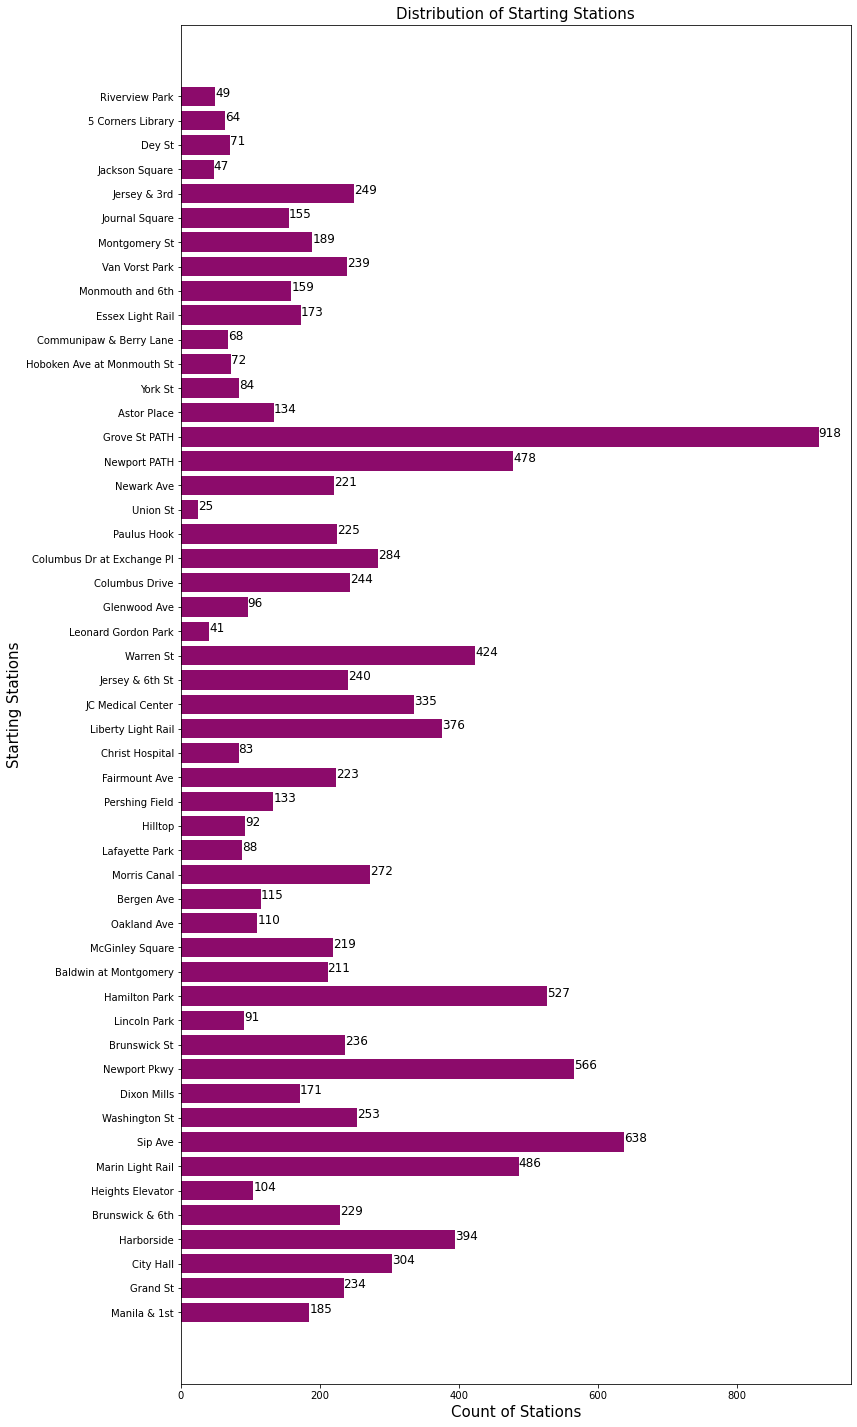

In [8]:
distribution_station(202101,"start")

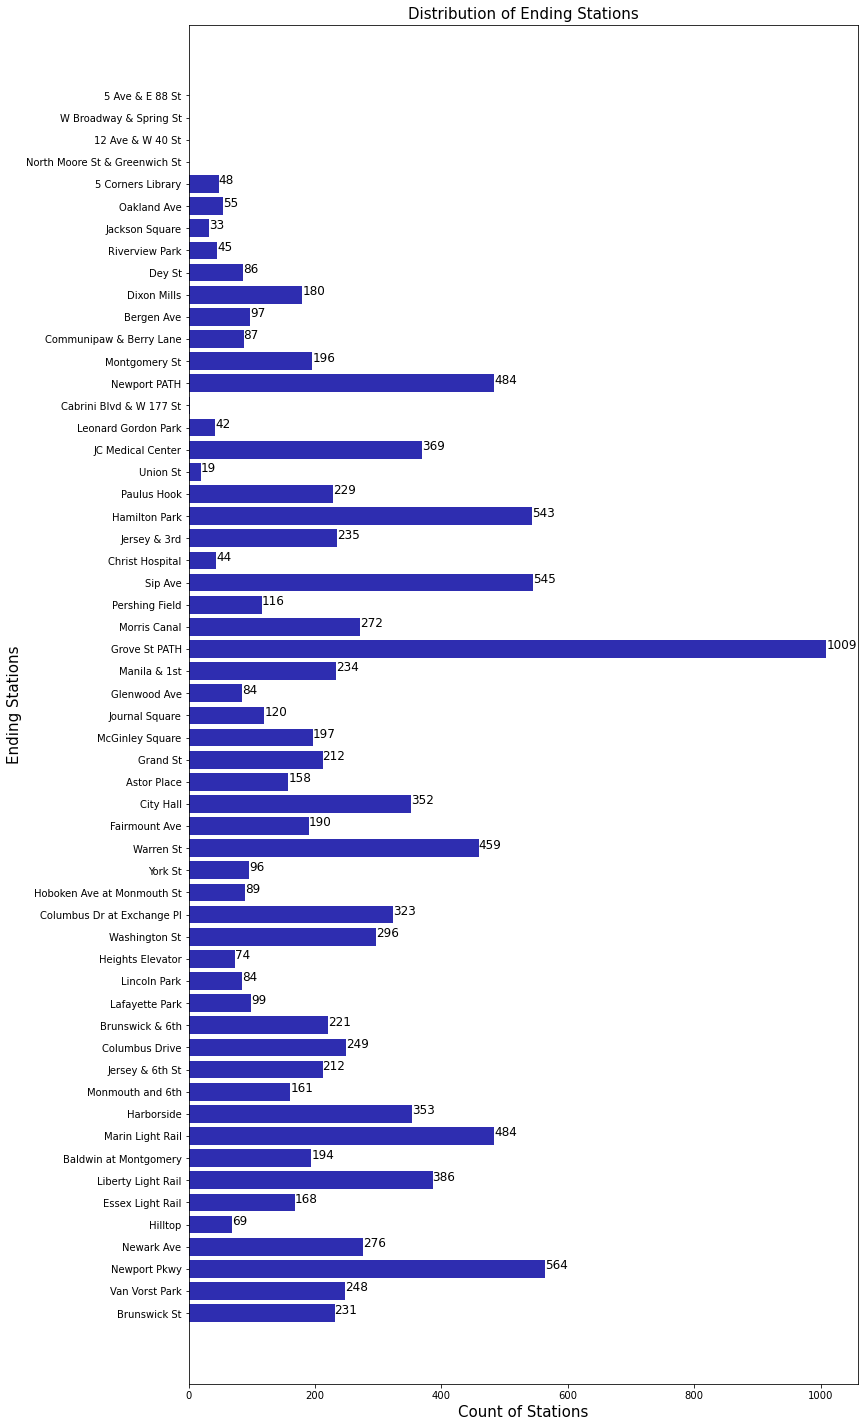

In [9]:
distribution_station(202101,"end")

* The **gender(date)** function returns the gender distribution as a piechart on the examined date.

In [10]:
def gender(date, ex=None):
    if date < 202102:
        raw=Counter(selectdate(date)['gender'])
        raw['Unknown']=raw[0]
        raw['Male']=raw[1]
        raw['Female']=raw[2]
        del raw[0]
        del raw[1]
        del raw[2]
        ks=raw.keys()
        vs = 100*np.array(list(raw.values()))/sum(raw.values())
        plt.title(f"{date} Gender Distribution",size=15)
        plt.pie(vs, labels=ks, explode=ex,autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
        plt.show()
    else:
        print("Date must be less than 202102")


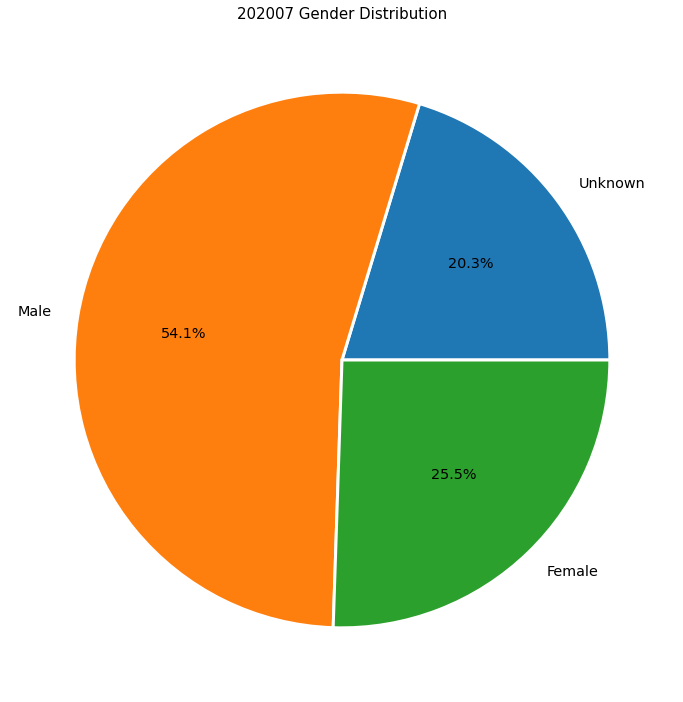

In [11]:
gender(202007)

* The **usertype(date)** function returns the distribution of users on the examined date as a piechart.

In [12]:
def usertype(date, ex=None):
    if date < 202102:
        raw=Counter(selectdate(date)['usertype'])
    else:
        raw=Counter(selectdate(date)['member_casual'])
    ks=raw.keys()
    vs = 100*np.array(list(raw.values()))/sum(raw.values())
    plt.title(f"{date} Usertype Distribution",size=15)
    plt.pie(vs, labels=ks, explode=ex,autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})
    plt.show()

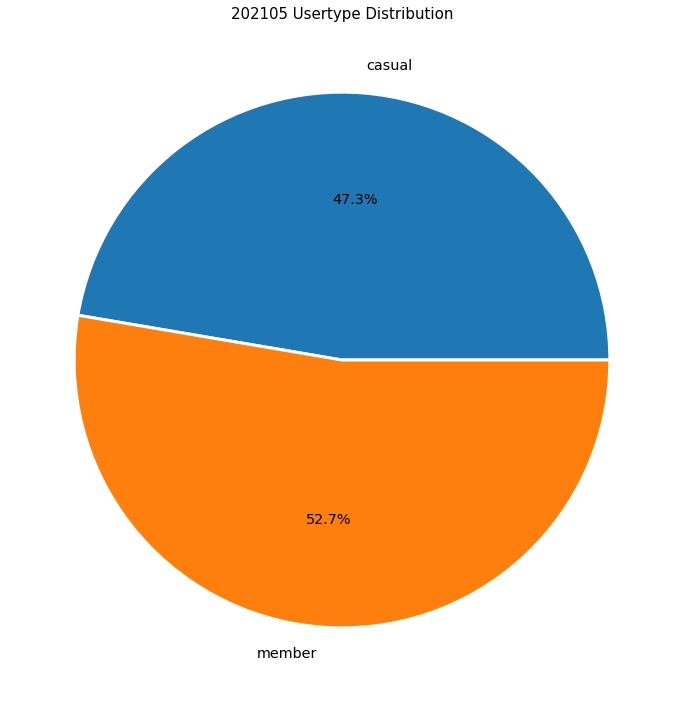

In [13]:
usertype(202105)

* The **birthyear(date)** function returns the age distribution of users on the examined date as a barchart.

In [14]:
def birthyear(date, ex=None):
    if date<202102:
        raw=Counter(selectdate(date)['birth year'])
        plt.rcParams['figure.figsize'] = 20,10
        raw_new = Counter(selectdate(date)['Age'])

        ys=raw_new.values()  
        ls = list(raw_new.keys())

        plt.xlabel("Age", size = 15)
        plt.ylabel(f"Count of Age", size = 15)
        plt.title(f"Distribution by Age", size =15)

        plt.bar(ls,ys,color= np.random.rand(3,))
        plt.show()
    else:
        print("Date must be less than 202102")

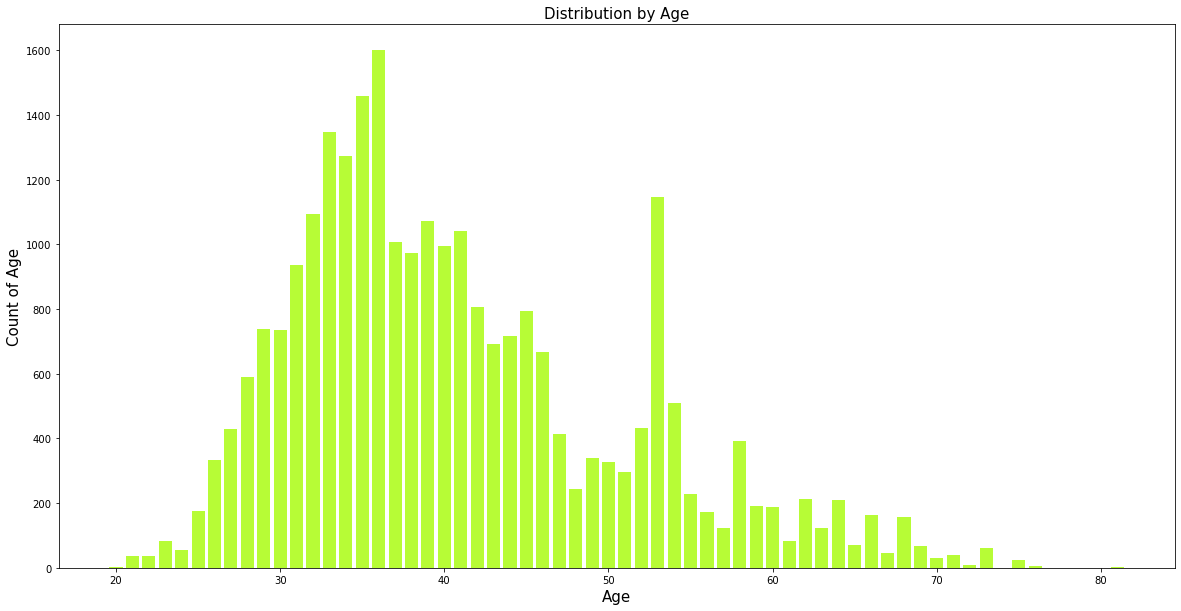

In [15]:
birthyear(202001)

* The **tripduration(date)** function visualizes the minute-based travel time with the trip minutes column I created via **selectdate(date)**.

In [16]:
def tripduration(date):
    if date<202102:
        sns.displot(data=selectdate(date),x="tripminutes", bins=range(1,61), aspect=10/4,color =np.random.rand(4,));
        plt.xlabel("Tripminutes", size = 15)
        plt.ylabel(f"Count", size = 15)
        plt.title("Trip Duration",size = 15)
    else:
        print("Date must be less than 202102")


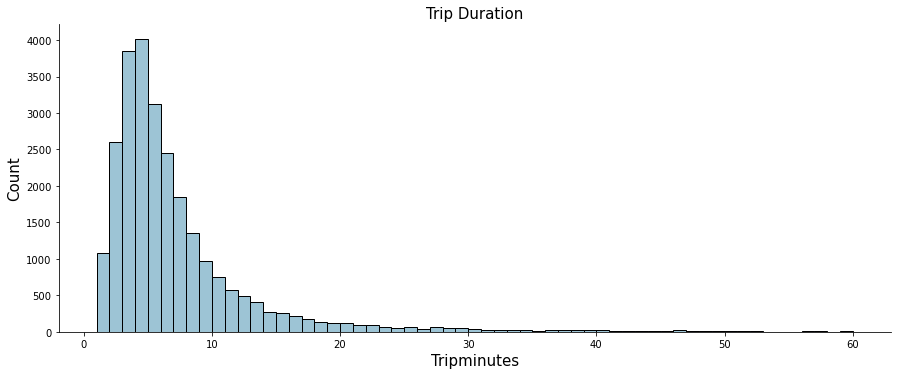

In [17]:
tripduration(202001)

* I used the haversine formula to measure the distance between the coordinates given in the dataset.

>The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.

* With the **distance_haversine(date)** function, it calculates and visualizes the driving distance from the distance between two coordinates.

In [18]:
def distance_haversine(date):
    if date <202102:
        lat1=selectdate(date)['start station latitude']
        lon1=selectdate(date)['start station longitude']
        lat2=selectdate(date)['end station latitude']
        lon2=selectdate(date)['end station longitude']
    else:
        lat1=selectdate(date)['start_lat']
        lon1=selectdate(date)['start_lng']
        lat2=selectdate(date)['end_lat']
        lon2=selectdate(date)['end_lng']

    lon1, lat1, lon2, lat2 = map(np.radians ,[lon1, lat1, lon2, lat2])  

    hs = np.sin((lat2-lat1)/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2 

    km =6371 * (2 * np.arcsin(np.sqrt(hs))) 

    df=pd.DataFrame(data=km, columns =['distance'])
    sns.set_theme()
    
    sns.displot(data=df, x="distance",bins=range(1,15),  aspect=10/5 )
    
    plt.xlabel("Distance(KM)", size = 15)
    plt.ylabel(f"Count", size = 15)
    plt.title("Driving Distance",size = 15)


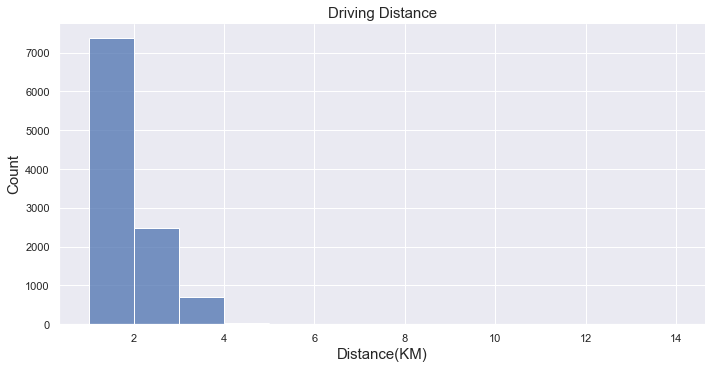

In [19]:
distance_haversine(202005)

* The **starthour(date,time)** function gives the start and end times of the rides as a horizontal bar chart.
> time parameters: **"starttime","stoptime"**   /   **"started_at", "ended_at"**

In [20]:
def starthour(date,time):
    if date < 202102:
        if f"{time}"=="starttime":
            raw=Counter(selectdate(date)['starttime'].dt.hour)
        else:
            raw=Counter(selectdate(date)['stoptime'].dt.hour)
    else:
         if f"{time}"=="started_at":
            raw=Counter(selectdate(date)['started_at'].dt.hour)
         else:
            raw=Counter(selectdate(date)['ended_at'].dt.hour)
            
    plt.rcParams['figure.figsize'] = 12,25
    time=time.title()
    ys=raw.values()
    ls = list(raw.keys())
    plt.xlabel("Count of Hours", size = 15)
    plt.ylabel(f"Hours", size = 15)
    plt.title(f"{time} Time", size =15)

    plt.barh(ls,ys,color= np.random.rand(3,))
    plt.show()

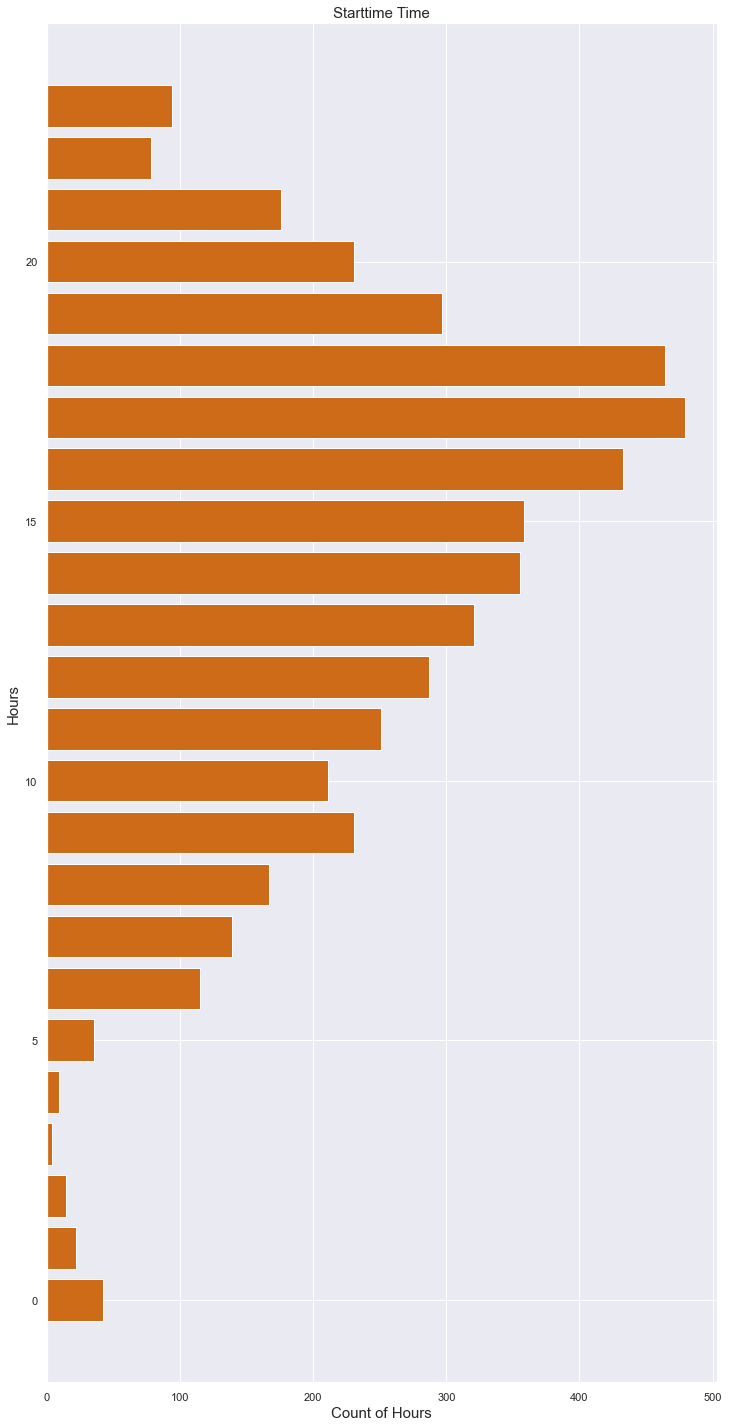

In [21]:
starthour(202102,"starttime")

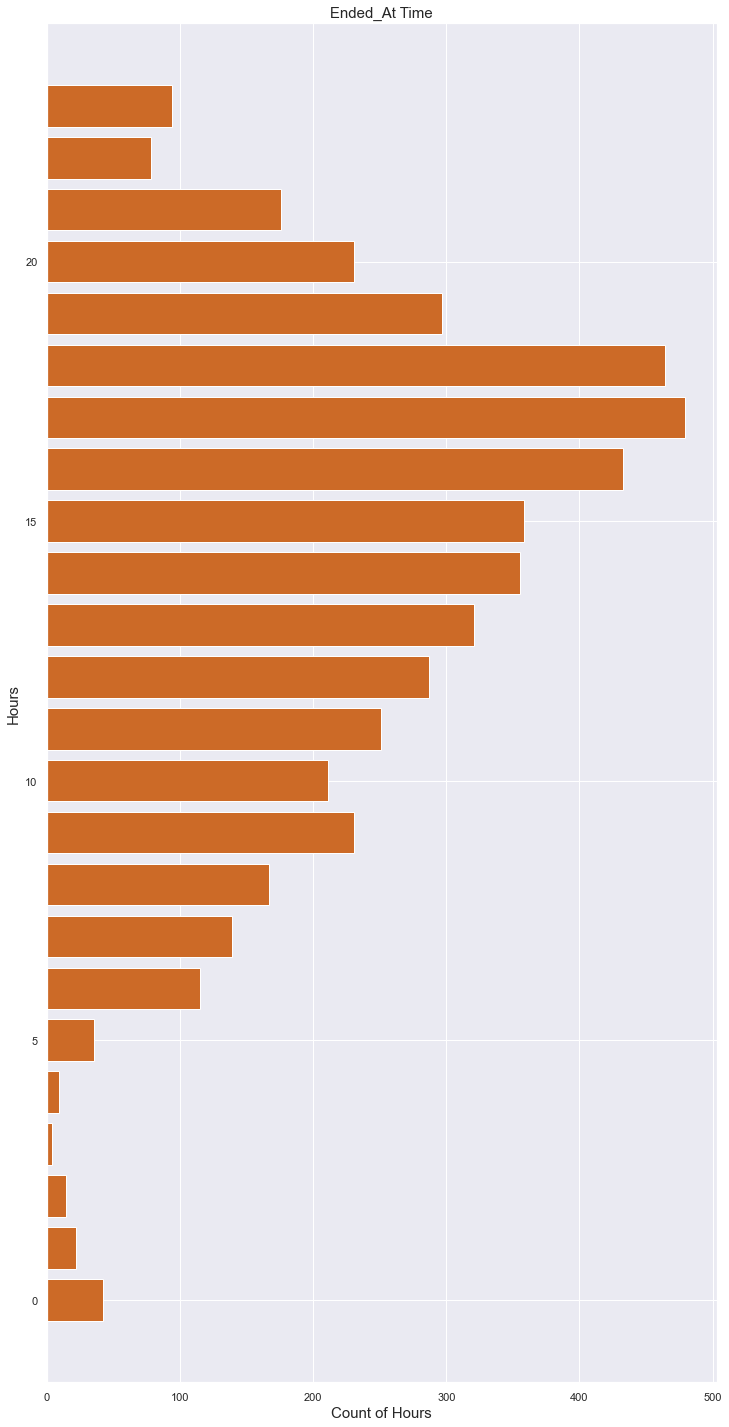

In [22]:
starthour(202102,"ended_at")